

# Project: Investigate a Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset i picked from what was offered for the project is the TMDB dataset. It is a movies database that used to be called IMDB dataset but as they explain it in the overview in the kaggle source ["We (Kaggle) have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use."](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home).
>
>I downloaded the version in [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb-5000-movie-dataset.zip/2) then downloaded the one udacity provided which they describe as [cleaned](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.).
>
>Taking a quick glance using excel spreadsheets, i first noticed that kaggle provided two csv files one for the movies and one for the credits.
>By organizing release dates in years i noticed that the one Udacity provided as a clean version had movies only from 1960 forward while the raw movies dataset from kaggle had movies prior to 1960.
>Also the cleaned version had Actor names in it while the raw kaggle one had the cast names in a separate csv called tmdb credits.
>So i chose the one Udacity provided; since it is already cleaned it would be easier to work with and i do not have to do JOINs with two csv files.

>The cleaned version described by udacity as ["This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue."](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)

**My questions** :
>
>1. Is investing in the movies industry profitable ? 
>
>2. What are the top 10 most and least profitable movies ?
>
>3. Is there a correlation between popularity and runtime  ?

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import csv

% matplotlib inline


# to change from scientfic notation to actual numbers
pd.options.display.float_format = '{:20,.2f}'.format

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

file = r'./tmdb-movies.csv'

#creating a  value for the udacity cleaned movie dataset
udacity = pd.read_csv(file)



In [18]:
#a function that returns the first 3 rows from the dataest
udacity.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [19]:
#a function that gives general information about the dataset
udacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [24]:
udacity.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
Duplicate Title             2
dtype: int64

> from the movies.head function we know that there is 20 columns -ignoring the untitled index column-; not all needed for my analysis.
>
> from movies.info we know that not all our rows are filled; some have nulls; cause the function only returns rows with non-nulls.

**for example:**

> director column has 10822 nonnull rows but the unique movies id - from the movies.id.unique function - has 10865 rows but the total nonnull movies id has 10866 rows; which means one should be dropped or edited from the id's at least. and there is about movies without director names.

### budget vs budget_adj:
>looking up the kaggle overview couldn't find why do we have two budget columns one called budget and the other called budget_adj.
then found this in the discussion section of the kaggle dataset source :[link](https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/45990)
it seems budget_adj is calculating for inflation based on the US dollar worth in 2010. Also found this link that worked on the dataset according to the same basis [link](https://zhuanlan.zhihu.com/p/35164262) and  i will assume the revenue_adj is the same; calculated based on the US dollar value in 2010
>
> from the describe function it is clear that the budget/budget_adj has a lot of values that are zeros, also the revenue columns.
>i do not think that is possible and most likely the rows are zeros because of lack of data or a mistake; either way thes rows should be deleted before considering finding any interestings findings concerning budgets and revenue.

### some other thoughts

> from the nunique function some interesting findings; unique imdb_id are less that the unique id column; it is normal for columns like budgets and revenue have less unique rows since it is measure of amount of money and do not need to be unique.
>but original title is also can have duplicates; since movies can be remade with similar titles in different times with different casts etc. So i have to check for that.

In [25]:
udacity['Duplicate Title'] = udclmvs.duplicated(['original_title'])
duplicates = udclmvs[udclmvs['Duplicate Title'] == True]
duplicates


id    imdb_id  popularity    budget    revenue  \
1133   281778  tt3297792    0.188264         0          0   
1194   296626  tt3534842    0.132764         0          0   
1349    42222  tt0076245    0.398651         0          0   
1440     7445  tt0765010    1.223786  26000000   43318349   
1513    62320  tt1014762    0.688361         0          0   
1707    79896  tt1336006    0.310600         0          0   
1753    36465  tt0992993    0.250389         0          0   
1757    21398  tt1220213    0.321244   5000000          0   
1865   220903  tt1533395    0.102223         0          0   
2036    41505  tt1179069    0.794885  22000000     851517   
2090    42194  tt0411951    0.596430  30000000     967000   
2118    33555  tt1522835    0.513524         0          0   
2227    38568  tt1049402    0.275607     30000     617000   
2485    26177  tt0207972    0.548720         0          0   
2489    16716  tt0216621    0.521573         0          0   
2513     6522  tt0123964    0.383326  80000000   73345029   
2562    30923  tt0164993    0.253305  21000000          0   
2571    10047  tt0151137    0.235223  60000000   66976317   
2695      467  tt0242527    0.718104         0          0   
2797    11088  tt0252503    0.272619  35000000          0   
2814    11889  tt0280778    0.223151         0          0   
2892    88751  tt0373051    1.996757  45000000  101702060   
2893     8909  tt0493464    1.982998  75000000  258270008   
3272     7351  tt0903627    0.281186   6000000    1300000   
3500    64586  tt1588398    0.851701  10000000          0   
3524    63207  tt1634121    0.755324  13000000          0   
3636     9364  tt1181614    0.414629   8000000     100915   
3654    73499  tt1646980    0.381174  17000000    3696232   
3669    84404  tt1682181    0.357401   1100000          0   
3738    54320  tt1541874    0.260875    500000          0   
...       ...        ...         ...       ...        ...   
10448    9960  tt0057261    0.501540         0          0   
10454   29056  tt0057449    0.249429         0          0   
10460   18331  tt0057372    0.198774         0          0   
10494    9542  tt0091209    0.799534         0    5844868   
10517   15392  tt0090888    0.502047         0    5738952   
10532   24913  tt0090655    0.385105   5000000          0   
10551   11415  tt0091223    0.302986   3000000          0   
10555   15698  tt0091875    0.284705         0          0   
10593   11886  tt0070608    2.272486  15000000   32056467   
10614    2926  tt0072281    0.412189         0          0   
10620   15171  tt0070016    0.359048         0          0   
10625   22307  tt0070698    0.257127    500000          0   
10628   25473  tt0070895    0.420585         0          0   
10639   26015  tt0069992    0.143165         0          0   
10642   16307  tt0070917    0.396864         0          0   
10644   29425  tt0069895    0.106051    275000          0   
10678     132  tt0065780    0.291051         0          0   
10686   51992  tt0065398    0.080626         0          0   
10691     907  tt0059113    1.282053  14000000  111721910   
10740   17529  tt0065126    0.311288         0   14250000   
10757     923  tt0077402    1.210531    650000   55000000   
10759     948  tt0077651    1.198849    300000   70000000   
10767   13333  tt0077594    0.581236         0          0   
10795  148980  tt0077215    0.214124   3000000          0   
10799   17212  tt0078067    0.184723         0          0   
10818   39995  tt0079482    0.047645         0          0   
10827    2661  tt0060153    0.410366   1377800          0   
10849   28270  tt0060445    0.206537         0          0   
10853   15598  tt0060086    0.163592         0          0   
10854   31602  tt0060232    0.146402         0          0   

                           original_title  \
1133                             Survivor   
1194                      Finders Keepers   
1349                                Julia   
1440                             Brothers   
151

> for original title column it seems we have 295 rows duplicates; since it would be toot tedious to check them one by one i will check for a sample but only from glancing at the results quickly i do guess titles like Robin Hood and/or Sherlock Holmes would definetly have different productions with different casts and different production dates under the same title. And i do know that Alfie was made twice under the same title, so will try to check for titles i find suprising that they would have more than one different production using the same original title.

In [26]:

#to check particular titles and there duplicates
check_title = udclmvs[udclmvs['original_title'] == 'Grace' ]
check_title.head()

id    imdb_id  popularity   budget  revenue original_title  \
1036  289416  tt3068192    0.289238        0        0          Grace   
1757   21398  tt1220213    0.321244  5000000        0          Grace   

                                                   cast homepage    director  \
1036  Alexia Fast|Joel David Moore|Lin Shaye|Alexis ...      NaN   Jeff Chan   
1757  Jordan Ladd|Samantha Ferris|Gabrielle Rose|Ste...      NaN  Paul Solet   

                      tagline       ...        runtime           genres  \
1036  Innocence ends in blood       ...             87  Thriller|Horror   
1757           Love. Undying.       ...             94  Horror|Thriller   

                                   production_companies release_date  \
1036            Automatik Entertainment|Colony Pictures     10/28/14   
1757  ArieScope Pictures|Dark Eye Entertainment|Leom...      8/14/09   

     vote_count vote_average  release_year    budget_adj  revenue_adj  \
1036         38          4.7          2014  0.000000e+00          0.0   
1757         21          4.9          2009  5.082002e+06          0.0   

      Duplicate Title  
1036            False  
1757             True  

[2 rows x 22 columns]

In [27]:
check_title = udclmvs[udclmvs['original_title'] == 'Into the Storm']
check_title.head()

id    imdb_id  popularity    budget    revenue  original_title  \
740   216282  tt2106361    1.315500  50000000  160602194  Into the Storm   
1753   36465  tt0992993    0.250389         0          0  Into the Storm   

                                                   cast  \
740   Richard Armitage|Sarah Wayne Callies|Matt Wals...   
1753  Brendan Gleeson|Iain Glen|James D'Arcy|Janet M...   

                                               homepage             director  \
740                                                 NaN         Steven Quale   
1753  http://www.hbo.com/movies/into-the-storm/index...  Thaddeus O'Sullivan   

            tagline       ...        runtime                 genres  \
740   Prepare to go       ...             89        Action|Thriller   
1753            NaN       ...            100  Drama|History|Foreign   

                                   production_companies release_date  \
740   New Line Cinema|Village Roadshow Pictures|Brok...       8/6/14   
1753                                                NaN      5/31/09   

     vote_count vote_average  release_year    budget_adj   revenue_adj  \
740         572          5.7          2014  4.605455e+07  1.479292e+08   
1753         13          5.8          2009  0.000000e+00  0.000000e+00   

      Duplicate Title  
740             False  
1753             True  

[2 rows x 22 columns]

In [28]:
check_title = udclmvs[udclmvs['original_title'] ==  'The Nutty Professor']
check_title.head()

id    imdb_id  popularity    budget    revenue       original_title  \
8480    9327  tt0117218    1.104510  54000000  128769345  The Nutty Professor   
10460  18331  tt0057372    0.198774         0          0  The Nutty Professor   

                                                    cast homepage  \
8480   Eddie Murphy|Jada Pinkett Smith|James Coburn|L...      NaN   
10460  Jerry Lewis|Stella Stevens|Del Moore|Med Flory...      NaN   

          director                                            tagline  \
8480   Tom Shadyac  Inside Sherman Klump, a party animal is about ...   
10460  Jerry Lewis         What does he become? What kind of monster?   

            ...        runtime                                  genres  \
8480        ...             95  Fantasy|Comedy|Romance|Science Fiction   
10460       ...            107                   Comedy|Romance|Family   

                             production_companies release_date vote_count  \
8480     Imagine Entertainment|Universal Pictures      6/26/96        334   
10460  Paramount Pictures|Jerry Lewis Enterprises       6/4/63         39   

      vote_average  release_year    budget_adj   revenue_adj  Duplicate Title  
8480           5.4          1996  7.507170e+07  1.790173e+08            False  
10460          6.7          1963  0.000000e+00  0.000000e+00             True  

[2 rows x 22 columns]

In [29]:
check_title = udclmvs[udclmvs['original_title'] =='Doctor Zhivago']
check_title.head()

id    imdb_id  popularity    budget    revenue  original_title  \
4084   19122  tt0324937    0.306821         0          0  Doctor Zhivago   
10691    907  tt0059113    1.282053  14000000  111721910  Doctor Zhivago   

                                                    cast homepage  \
4084   Sam MacLintock|Keira Knightley|Hans Matheson|S...      NaN   
10691  Omar Sharif|Julie Christie|Geraldine Chaplin|R...      NaN   

                director                                            tagline  \
4084   Giacomo Campiotti                                                NaN   
10691         David Lean  Turbulent were the times and fiery was the lov...   

            ...        runtime             genres       production_companies  \
4084        ...            226              Drama                        NaN   
10691       ...            197  Drama|Romance|War  Metro-Goldwyn-Mayer (MGM)   

      release_date vote_count vote_average  release_year    budget_adj  \
4084      11/24/02         20          5.9          2002  0.000000e+00   
10691     12/22/65        126          6.9          1965  9.688789e+07   

        revenue_adj  Duplicate Title  
4084   0.000000e+00            False  
10691  7.731786e+08             True  

[2 rows x 22 columns]

> All the original titles i checked had different productions under the same title with different release dates and casts and directors etc.
>
>this leaves checking for the non unique id

In [30]:
#Creating a new column to attach to duplicated titles
udacity['Duplicate ID'] = udacity.duplicated(['id'])

#a function to check for duplicated ids
idid = udacity[udacity['Duplicate ID'] == True]
idid.head()

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline      ...       \
2090  Dwight H. Little  Survival is no game      ...        

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

      release_date vote_count vote_average release_year  budget_adj  \
2090       3/20/10        110          5.0         2010  30000000.0   

      revenue_adj  Duplicate Title  Duplicate ID  
2090     967000.0             True          True  

[1 rows x 23 columns]

> Since we know it is TEKKEN; we need a function to check if it is a duplicate

In [32]:
checking = udacity[udacity['original_title'] == 'TEKKEN']
checking.head()

id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline      ...       \
2089  Dwight H. Little  Survival is no game      ...        
2090  Dwight H. Little  Survival is no game      ...        

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

      release_date vote_count vote_average release_year  budget_adj  \
2089       3/20/10        110          5.0         2010  30000000.0   
2090       3/20/10        110          5.0         2010  30000000.0   

      revenue_adj  Duplicate Title  Duplicate ID  
2089     967000.0            False         False  
2090     967000.0             True          True  

[2 rows x 23 columns]

> the TEKKEN movie definitely has a duplicate entry; so one must be removed

## Data Cleaning 

>i have to remove the duplicate entry first.

In [33]:
#a function to remove duplicates in the id columns
udacity.drop_duplicates(subset=['id'],inplace=True)

In [34]:
checking = udacity[udacity['original_title'] == 'TEKKEN']
checking.head()

id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline      ...       \
2089  Dwight H. Little  Survival is no game      ...        

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

      release_date vote_count vote_average release_year  budget_adj  \
2089       3/20/10        110          5.0         2010  30000000.0   

      revenue_adj  Duplicate Title  Duplicate ID  
2089     967000.0            False         False  

[1 rows x 23 columns]

>now that i made sure i removed the duplicate entry i can move on to the next step
>
>by following the questions i have on mind, there is columns could be dropped and not needed for my analysis

In [35]:
#i will sort the dataset by release year to make it easier along th way when slicing parts of the data into separate lists

udacity = udacity.sort_values(by=['release_year'], ascending=True)

### will create a dataset without the uneeded columns 

#creating the list for the columns i want deleted
deletion = ['id','imdb_id', 'homepage', 'tagline', 'overview', 'vote_count', 'budget', 'production_companies', 'keywords', 'vote_average', 'Duplicate Title', 'Duplicate ID', 'revenue','release_date', 'director', 'cast' ]

#creating the new movie data set - edited data set- after dropping the unneeded columns
edited = udacity.drop(deletion,1)

In [36]:
#to check the newly cleaned dataset

edited.head(3)


popularity         original_title  runtime                    genres  \
10172    0.256779                 Exodus      208  Action|Drama|History|War   
10141    2.610362                 Psycho      109     Drama|Horror|Thriller   
10142    1.872132  The Magnificent Seven      128  Action|Adventure|Western   

       release_year    budget_adj   revenue_adj  
10172          1960  0.000000e+00  0.000000e+00  
10141          1960  5.949601e+06  2.359350e+08  
10142          1960  1.474593e+07  3.616441e+07

In [37]:
edited.info()
edited.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 10172 to 0
Data columns (total 7 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 679.1+ KB


popularity        10814
original_title    10571
runtime             247
genres             2039
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

>i will create a seperate list for my first question and to do aggregations and editing

In [39]:
# a budget and revenue list with needed title and year of release for further exploration
budget_revenue = edited[['budget_adj','revenue_adj', 'release_year', 'original_title', 'runtime', 'popularity']].copy()
budget_revenue.describe()

budget_adj   revenue_adj  release_year       runtime    popularity
count  1.086500e+04  1.086500e+04  10865.000000  10865.000000  10865.000000
mean   1.754989e+07  5.136900e+07   2001.321859    102.071790      0.646446
std    3.430753e+07  1.446383e+08     12.813260     31.382701      1.000231
min    0.000000e+00  0.000000e+00   1960.000000      0.000000      0.000065
25%    0.000000e+00  0.000000e+00   1995.000000     90.000000      0.207575
50%    0.000000e+00  0.000000e+00   2006.000000     99.000000      0.383831
75%    2.085325e+07  3.370173e+07   2011.000000    111.000000      0.713857
max    4.250000e+08  2.827124e+09   2015.000000    900.000000     32.985763

### Further Cleaning

> I should first calculate the actual revenue for each movie by subtracting the revenue_adj from the budget_adj; so a movie that has a revenue but has no budget recorded should be ignored and vice-versa. And by not recorded here i mean that has zero for either budget or revenue.
>
>it seems half or more the data entries for revenue and budget are missing since the 2nd quartile/ MEDIAN is 0; so at least half the data - if not more - entries will be dropped


In [40]:
#a list of the columns targeted
zeros=['budget_adj', 'revenue_adj', ]

#any row with zeros will be replaced with NAN
budget_revenue[zeros] = budget_revenue[zeros].replace(0, np.NAN)

# Removing all the row which has NaN value in bdgrev 
budget_revenue.dropna(subset = zeros, inplace = True)

budget_revenue.describe()

budget_adj   revenue_adj  release_year      runtime   popularity
count  3.854000e+03  3.854000e+03   3854.000000  3854.000000  3854.000000
mean   4.423999e+07  1.370647e+08   2001.261028   109.220291     1.191554
std    4.480925e+07  2.161114e+08     11.282575    19.922820     1.475162
min    9.693980e-01  2.370705e+00   1960.000000    15.000000     0.001117
25%    1.309053e+07  1.835735e+07   1995.000000    95.000000     0.462368
50%    3.001611e+07  6.173068e+07   2004.000000   106.000000     0.797511
75%    6.061307e+07  1.632577e+08   2010.000000   119.000000     1.368324
max    4.250000e+08  2.827124e+09   2015.000000   338.000000    32.985763

>now i need to calculate the net profit

In [42]:
#creating a new column with the aggregation between budget and revenue columns
budget_revenue['Net Profit'] = budget_revenue['revenue_adj'] - budget_revenue['budget_adj']

#a new clean list for my exploration
net_profit = budget_revenue[['release_year','Net Profit','original_title' ]].copy()

#a separate list for popularity and runtime for my third question
popularity_runtime = budget_revenue[['popularity', 'runtime']].copy()


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
#### Year over year, is the movie industry profiting ?

>First i should check my newly cleaned netpro list

In [43]:
net_profit.describe()

release_year    Net Profit
count   3854.000000  3.854000e+03
mean    2001.261028  9.282470e+07
std       11.282575  1.940715e+08
min     1960.000000 -4.139124e+08
25%     1995.000000 -1.504995e+06
50%     2004.000000  2.737064e+07
75%     2010.000000  1.074548e+08
max     2015.000000  2.750137e+09

>Using group by function; now i can plot and see how the profits goes year after year

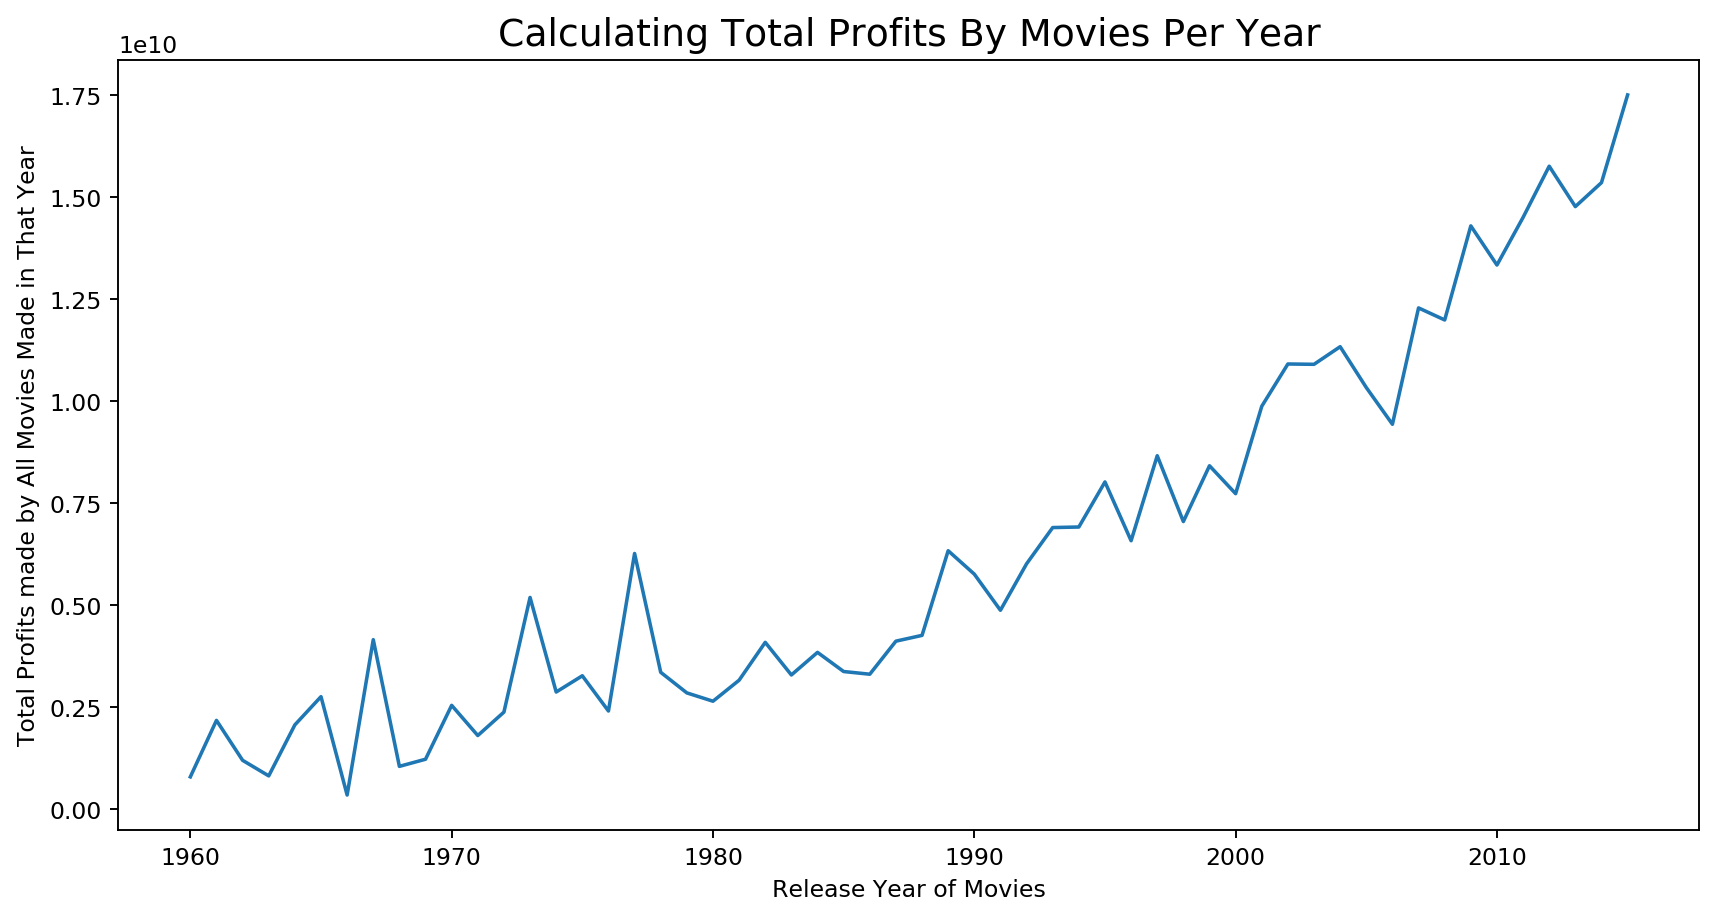

In [44]:
#a new list for plotting the yearly total profits per year using the group by function and sum aggregation
yearly_profit = net_profit.groupby('release_year')['Net Profit'].sum()

#width, height & resolution of the plot
plt.figure(figsize=(12,6), dpi = 170)

#x-axis label
plt.xlabel('Release Year of Movies', fontsize = 10)

# y-axis label
plt.ylabel('Total Profits made by All Movies Made in That Year', fontsize = 10)

#plot title
plt.title('Calculating Total Profits By Movies Per Year', fontsize = 16)

plt.plot(yearly_profit)


#### needed explanation: 
>Because were talking in billions of dollars; the y-axis shows numbers of 1e10; which means 1 with 10 zeros in front of it.
> I used line chart because it is cleaner and clear enough and easy to see the fluctuation on the profits over the years

### Research Question 2  

>Top 10 movies and lowest movies per revenue

Text(0, 0.5, 'Name Of The Movie')

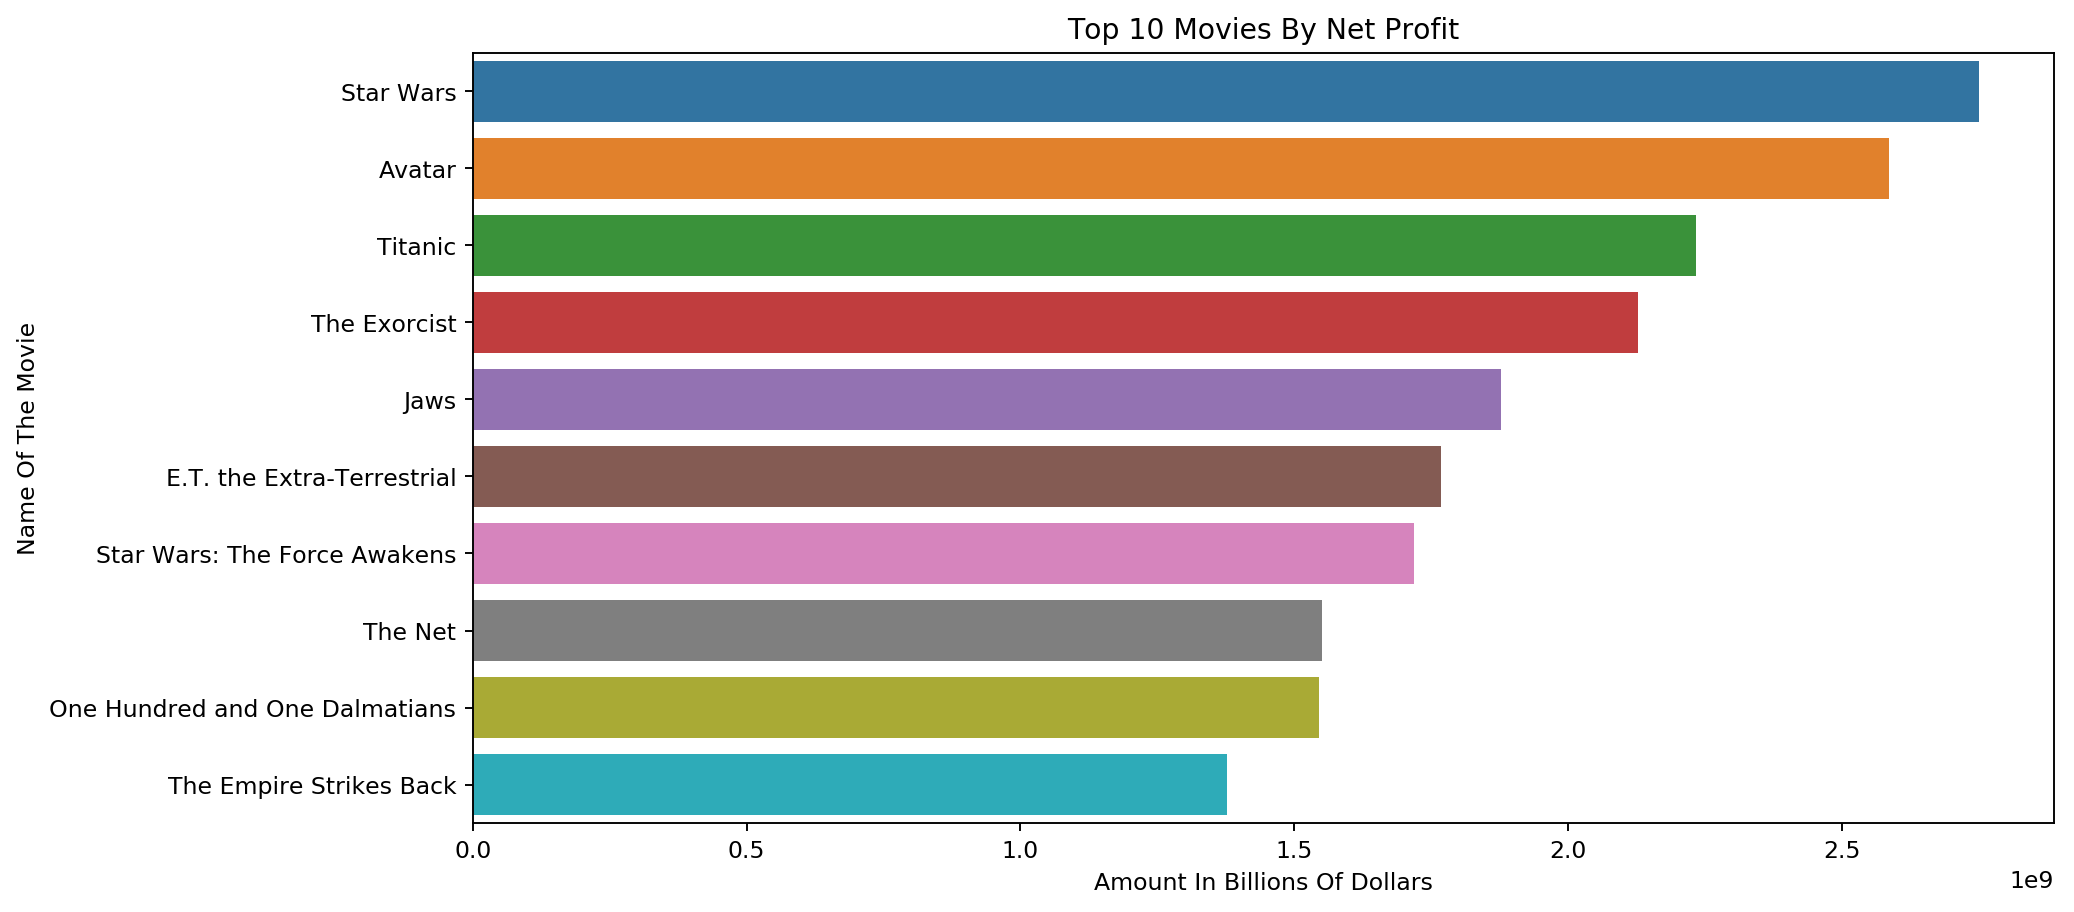

In [46]:

#this is used to resort the list based on the net profit amount from the descending

net_profit = net_profit.sort_values(by=['Net Profit'], ascending=False)

#slicing the first 10 for the top 10
top10 = net_profit[:10]

#slicing the last 10 to get the lowest then resort it
low10 = net_profit[-10:]
low10 = low10.sort_values(by=['Net Profit'], ascending=True)

#width, height & resolution of the plot
plt.figure(figsize=(12,6), dpi = 170)

#columns used and data source
g=sns.barplot(y="original_title", x="Net Profit", data=top10)
plt.title('Top 10 Movies By Net Profit')
plt.xlabel('Amount In Billions Of Dollars')
plt.ylabel('Name Of The Movie')




Text(0, 0.5, 'Name of The Movie')

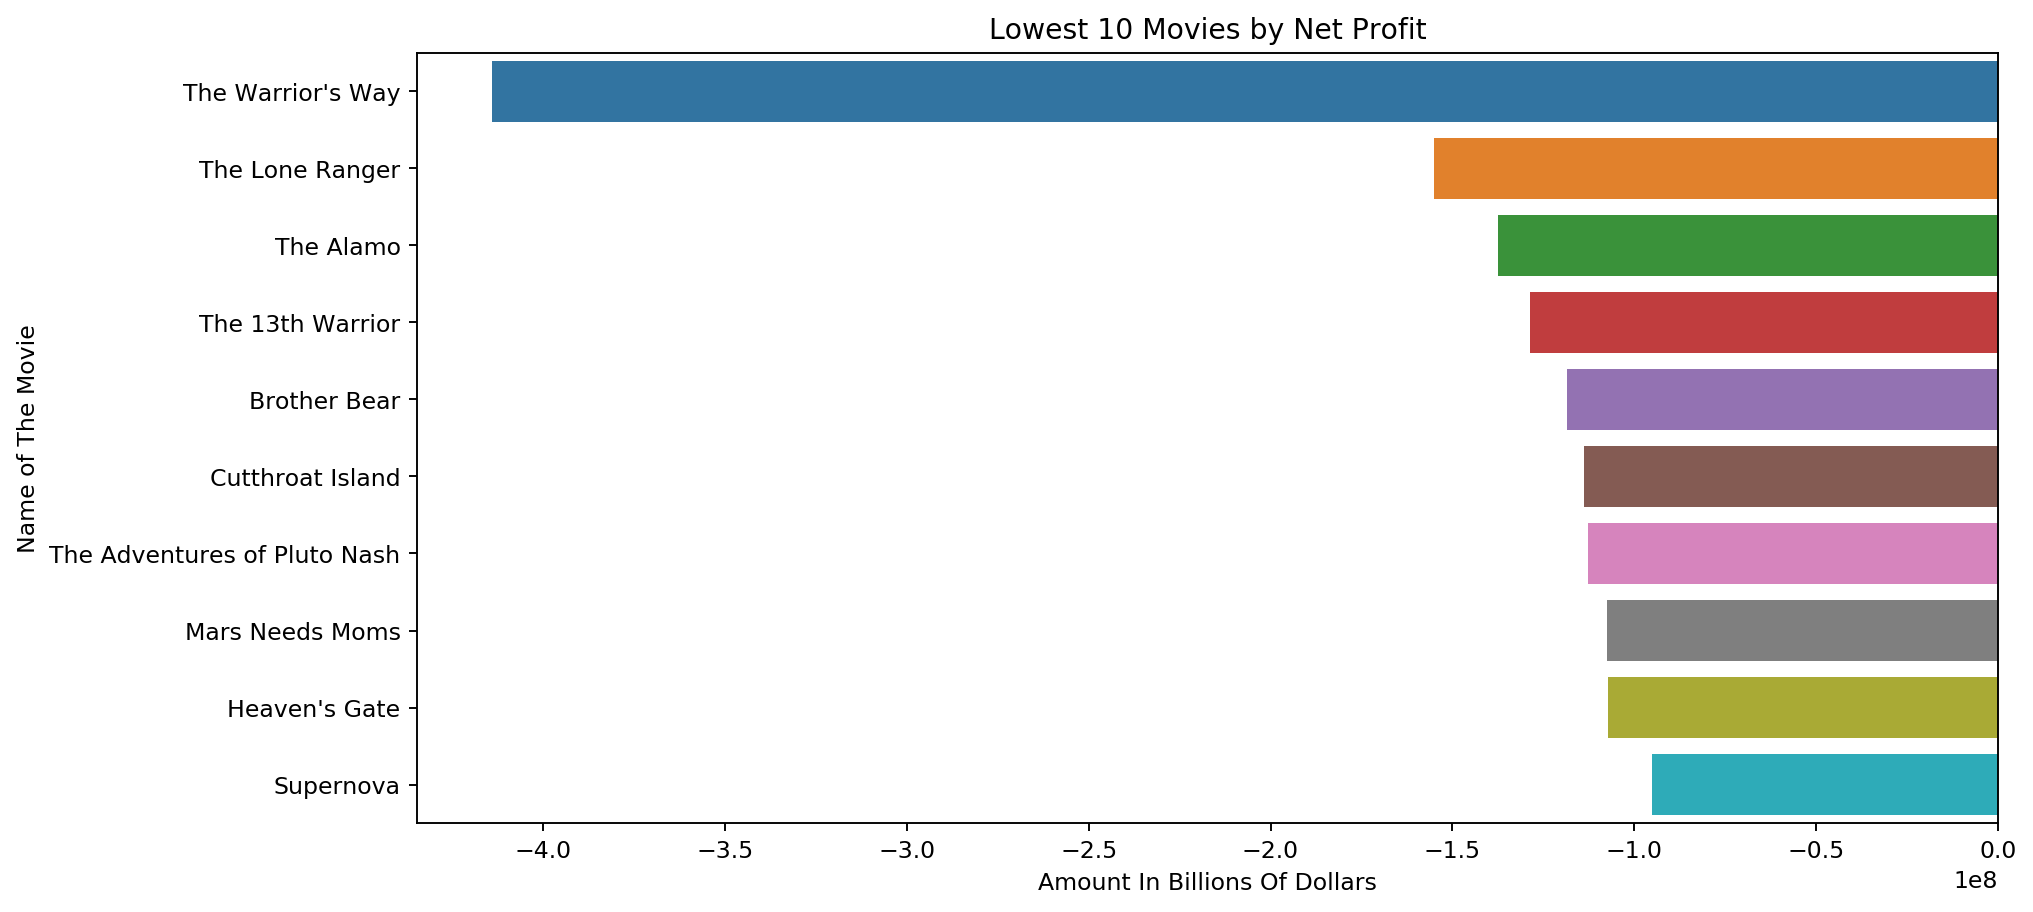

In [47]:
plt.figure(figsize=(12,6), dpi = 170 )


g=sns.barplot(y="original_title", x="Net Profit", data=low10)
plt.title('Lowest 10 Movies by Net Profit')
plt.xlabel('Amount In Billions Of Dollars')
plt.ylabel('Name of The Movie')


> I used bar chart because it is easier to compare between different movies when they are stacked over each other while names of movies do not get smudged when there is too long of a movie title

### Research Question 3  

>Is there a correlation betwen runtime and popularity ?

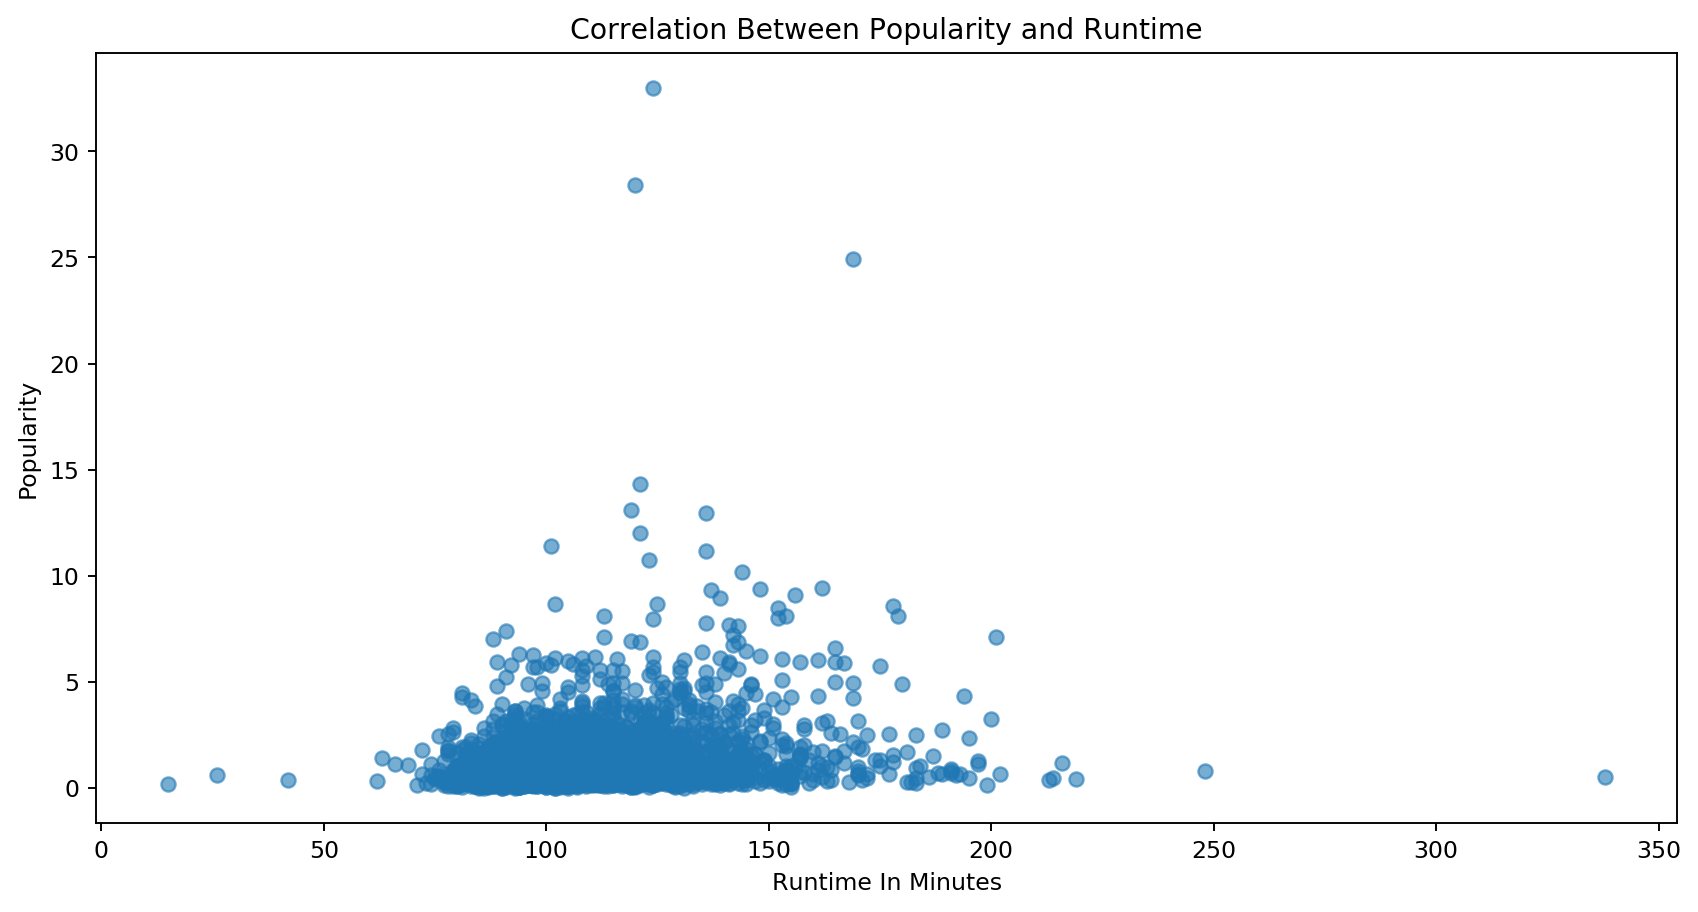

In [48]:
plt.figure(figsize=(12,6), dpi = 170)
x = popularity_runtime['runtime']
y = popularity_runtime['popularity']
plt.title('Correlation Between Popularity and Runtime')
plt.xlabel('Runtime In Minutes', fontsize = 10)
plt.ylabel('Popularity')
plt.scatter(x, y, alpha = 0.6)


<a id='conclusions'></a>
## Conclusions

**based solely on the data after removing all that has zeros in budget or revenue:**

>1. Movie idustry is generally profitable.
>
>2. The top 10 movies brought in more than what was lost by the lowest 10; also it was interesting seeing three star wars movies in the top 10.
>
>3. There seem to be no correlation between popularity and runtime of the movie; most unpopular are between 50 minutes and 200 minutes mark with saturation around 100 and 150 minutes; and the most popular seem to lie in beteen the 100 and 150 minutes mark. Most popular being with a >25 mark for popularity.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0